## Exercise in Photogrammetry II
# Ex. 03 Triangulation
### Submission: xx.xx.xxxx 
### Points: 15


In this exercise you  need to estimate the 3D position of points using the triangulation approach described in the lecture.

You are given two images ```0400.jpg``` and ```0840.jpg```, and a set of point correspondences stored in the file ```x1x2.mat```. 
Here $x1$ denotes the pixel coordinates in the first image and $x2$ the pixel coordinates in the second image. 

Assume for both cameras affine sensors with principal point $x_h = [300, 240]^T$ pel, camera constant
$c = 522$ pel, shear $s = 0$ and scale difference $m = 0$.

For this exercise we provide the parameters of the relative orientation between the cameras.

**DATA:** Extract the data from the provided zip file with the password: photo

**Tasks**:

1. Setup the calibration matrix and print the result. Given the image coordinates $x1$ and $x2$ compute the direction for each point in the corresponding camera coordinate system. (2 Points)
2. Visualize the centers of projection of the first and second camera. Additionally visualize the direction of each point w.r.t. the coordinate system of the first camera.	Directions which correspond to the same point should have the same color. Use a threedimensional plot to see where the corresponding directions should intersect. (**Hint:** use `quiver(...)` for plotting the directions) (5 Points)
3. Write a function that performs triangulation as presented in the lecture. Test your function for the given coordinates and extend your visualization (of task 2) by the 3D points. (3 Points)
4. Check if your triangulation is correct by projecting the 3D points to both images and visualize your results. (5 points)
	

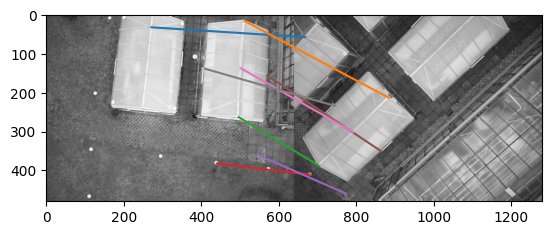

In [1]:
import matplotlib.image
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True)

R = np.array([[0.7201, -0.6648, 0.1988],
              [0.6533,  0.7461, 0.1286],
              [-0.2338, 0.0373, 0.9716]])
# Baseline
b = np.array([[59.5340], 
              [-39.2248],
              [1]])

pts1 = scipy.io.loadmat("./data/x1x2.mat")["x1"]
pts2 = scipy.io.loadmat("./data/x1x2.mat")["x2"]

img1 = matplotlib.image.imread("data/0400.jpg")
img2 = matplotlib.image.imread("data/0840.jpg")
I = np.hstack([img1,img2])
plt.figure()
plt.imshow(I,cmap='gray')
for i in range(pts1.shape[0]):
    plt.plot([pts1[i,1],pts2[i,1]+img1.shape[1]],[pts1[i,0],pts2[i,0]],'-')
plt.show()

 # Match colors from the beginning of this exercise.
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink' ,'gray']

### 1. Setting up the calibration matrix $K$.

In [2]:
C = 522
K = np.array([[C, 0, 300], [0, C, 240], [0, 0, 1]])
print(K)

[[522   0 300]
 [  0 522 240]
 [  0   0   1]]


### Compute direction of $x_1$ and $x_2$ given in pixel coordinates.  
#### First we need to convert those points from pixel coordinates to normalized image coordinates.

In [3]:
print(pts1)
print(pts2)

[[ 30.55229084 271.52440239   1.        ]
 [ 13.73954183 510.96762948   1.        ]
 [262.32261905 496.39880952   1.        ]
 [381.8797619  439.95595238   1.        ]
 [358.8797619  544.0702381    1.        ]
 [154.39880952 569.8797619    1.        ]
 [136.67738095 502.67738095   1.        ]
 [137.60119048 410.08214286   1.        ]]
[[ 56.0502988   28.18575697   1.        ]
 [212.43690476 243.95595238   1.        ]
 [387.43690476  63.23452381   1.        ]
 [411.04404762  41.64642857   1.        ]
 [459.92053571 133.97589286   1.        ]
 [350.43690476 224.28452381   1.        ]
 [301.15833333 152.36071429   1.        ]
 [232.91785714 103.63928571   1.        ]]


#### $pts1_{norm}$ and $pts2_{norm}$ stand for points in normalized image coordinates in respective cameras.  
#### $x_{img} = K^{-1}x_{pixel}$
#### We achieve that by multiplying them by the inverse of calibration matrix from the left hand side.

In [4]:
K_inv = np.linalg.inv(K)

pts1_norm = np.dot(pts1, K_inv.T)
pts2_norm = np.dot(pts2, K_inv.T)

print(pts1_norm)
print(pts2_norm)

[[-0.51618335  0.06039158  1.        ]
 [-0.54839168  0.51909508  1.        ]
 [-0.07217889  0.49118546  1.        ]
 [ 0.15685778  0.38305738  1.        ]
 [ 0.11279648  0.58251003  1.        ]
 [-0.27892948  0.63195357  1.        ]
 [-0.31287858  0.50321337  1.        ]
 [-0.31110883  0.32582786  1.        ]]
[[-0.46733659 -0.40577441  1.        ]
 [-0.16774539  0.00757845  1.        ]
 [ 0.16750365 -0.33863118  1.        ]
 [ 0.21272806 -0.37998768  1.        ]
 [ 0.30636118 -0.20311132  1.        ]
 [ 0.09662242 -0.03010628  1.        ]
 [ 0.00221903 -0.16789135  1.        ]
 [-0.12850985 -0.26122742  1.        ]]


#### Having normalized image coordinates we can find the respective directions $r$ and $s$ using the formulas:  
#### $r = R'^Tx'$ $s = R''^Tx''$
#### So basically multiplying each point in normalized image coordinates by the camera's transposed rotation matrix.  

In [5]:
pts1_dir = np.dot(pts1_norm, np.eye(3).T)
pts2_dir = np.dot(pts2_norm, R.T)

print(pts1_dir)
print(pts2_dir)

[[-0.51618335  0.06039158  1.        ]
 [-0.54839168  0.51909508  1.        ]
 [-0.07217889  0.49118546  1.        ]
 [ 0.15685778  0.38305738  1.        ]
 [ 0.11279648  0.58251003  1.        ]
 [-0.27892948  0.63195357  1.        ]
 [-0.31287858  0.50321337  1.        ]
 [-0.31110883  0.32582786  1.        ]]
[[ 0.13202975 -0.47945928  1.06572791]
 [ 0.07296839  0.02466622  1.01110155]
 [ 0.54454139 -0.01462259  0.9198067 ]
 [ 0.60460129 -0.01593357  0.90769064]
 [ 0.55443909  0.17720441  0.8923967 ]
 [ 0.28839246  0.16926114  0.94788671]
 [ 0.31201209  0.00478595  0.96481884]
 [ 0.27992405 -0.15025727  0.99190182]]


#### We have achieved the directions from optical centers to the points. We effectively transformed 2D homogeneous image coordinates into 3D cartesian directions. We can normalize those directions now to keep unit length.

In [6]:
pts1_dir_norm = pts1_dir / np.linalg.norm(pts1_dir, axis=1)[:, np.newaxis]
pts2_dir_norm = pts2_dir / np.linalg.norm(pts2_dir, axis=1)[:, np.newaxis]

print(pts1_dir_norm)
print(pts2_dir_norm)

[[-0.458022    0.05358691  0.88732423]
 [-0.43763729  0.41425749  0.7980378 ]
 [-0.06465004  0.43995076  0.89569174]
 [ 0.14493226  0.35393446  0.92397242]
 [ 0.09700645  0.50096627  0.86001311]
 [-0.22949838  0.51996053  0.8227828 ]
 [-0.2691717   0.4329181   0.86030722]
 [-0.28365347  0.29707354  0.91174998]]
[[ 0.11226561 -0.40768681  0.90619418]
 [ 0.07195872  0.02432491  0.99711095]
 [ 0.50938823 -0.01367862  0.8604281 ]
 [ 0.55430723 -0.01460813  0.83218394]
 [ 0.52038197  0.1663194   0.83758012]
 [ 0.28691737  0.16839539  0.9430384 ]
 [ 0.30769618  0.00471975  0.95147296]
 [ 0.26875997 -0.14426463  0.95234227]]


#### I can now calculate the lengths of my rays and find the approximated intersection.  
#### https://www.youtube.com/watch?v=UZlRhEUWSas&ab_channel=CyrillStachniss 12:23 - Triangulation for Image Pairs.  
#### The system of equations to solve is:  
$$\begin{bmatrix} r^Tr & -s^Tr\\ r^Ts & -s^Ts\end{bmatrix}\begin{bmatrix} \lambda\\ \mu\end{bmatrix}=\begin{bmatrix} (X_{O''}-X_{O'})^T\\ (X_{O''}-X_{O'})^T\end{bmatrix}\begin{bmatrix} r\\ s\end{bmatrix}$$  
#### where:
#### $r$ and $\lambda$ are the direction and length of the first ray, $s$ and $\mu$ are the direction and length of the second ray.  
#### Muliplying these and adding them to camera locations I get points $F$ and $G$, which are the closest points between two rays. Averaging them gives me my intersection H.  
#### $H = (F+G)/2$

In [7]:
def triangulate(r, s, Xo2, Xo1):
    
    A = np.array([[r.T @ r, -s.T @ r],
                  [r.T @ s, -s.T @ s]])

    Xo_diff = Xo2 - Xo1

    B = np.array([np.dot(Xo_diff, r), np.dot(Xo_diff, s)])

    solution = np.linalg.solve(A, B)
    lambda_val, mu_val = solution

    F = Xo1 + (r * lambda_val)
    G = Xo2 + (s * mu_val)

    return (F+G)/2

#### Triangulate the rays.

In [8]:
triangulated_pts = []
for i in range(len(pts1_dir_norm)):
    H = triangulate(pts1_dir_norm[i], pts2_dir_norm[i], b[:,0], np.zeros(3))
    triangulated_pts.append(H)

print(triangulated_pts)

[array([ 46.88951755,  -2.81671773, -86.21087599]), array([ 51.00227126, -43.92221026, -89.59831176]), array([  7.28939287, -39.48831187, -84.43052626]), array([ -15.33142008,  -39.18512556, -108.19951875]), array([ -11.46972066,  -62.87020773, -110.92144611]), array([ 28.16637733, -58.6514934 , -96.54479313]), array([ 28.9692751 , -41.79244102, -87.82115966]), array([ 30.90893272, -27.58154769, -92.82528552])]


#### I need some easy way to create transformations.

In [9]:
def homogeneous_transformation(translation, rotation, scale):
    
    # Construct translation matrix.
    translation_matrix = np.eye(4)
    translation_matrix[:3, 3] = translation.reshape(-1)

    # Construct scale matrix.
    scale_matrix = np.eye(4)
    scale_matrix[:3, :3] = np.diag(scale)

    # Construct rotation matrix.
    rotation_matrix = np.eye(4)
    rotation_matrix[:3, :3] = rotation

    # Combine translation, scale, and rotation.
    homogeneous_matrix = np.dot(translation_matrix, np.dot(scale_matrix, rotation_matrix))
    
    return homogeneous_matrix

#### I need some 3D camera gizmo representation.

In [10]:
from mpl_toolkits.mplot3d import axes3d
def generate_camera(ax, b, R, s, arrow_length, epipolar_dir, cam_label):

    # Create transformation.
    transform = homogeneous_transformation(b, R, s)

    # Create wireframe.
    X = np.array([-10.0, -10.0, 10.0, 10.0, -10.0], dtype=float)
    Y = np.array([-10.0, 10.0, 10.0, -10.0, -10.0], dtype=float)
    Z = np.array([[-10.0, -10.0, -10.0, -10.0, -10.0], [10.0, 10.0, 10.0, 10.0, 10.0]], dtype=float)

    # Get all points together.
    X = np.hstack((X, X))
    Y = np.hstack((Y, Y))
    large = np.vstack((X, Y, Z.flatten()))

    # Transform the points.
    large = np.dot(transform, np.vstack((large, np.ones(large.shape[1]))))

    # Normalize each column (back to cartesian).
    homogeneous_coords_large = large[3, :]
    large = large[:3, :] / homogeneous_coords_large

    # Back to wireframe-compatible.
    X = large[0, :5]
    Y = large[1, :5]
    Z = large[2, :].reshape(2, -1)

    # Draw orientation.
    ax.plot_wireframe(X, Y, Z, linewidth=0.6, color='black')
    ax.quiver(b[0], b[1], b[2], R[:, 0][0], R[:, 0][1], R[:, 0][2], normalize=True, color='red', length=50, arrow_length_ratio=0.3)
    ax.quiver(b[0], b[1], b[2], R[:, 1][0], R[:, 1][1], R[:, 1][2], normalize=True, color='green', length=50, arrow_length_ratio=0.3)
    ax.quiver(b[0], b[1], b[2], R[:, 2][0], R[:, 2][1], R[:, 2][2], normalize=True, color='blue', length=50, arrow_length_ratio=0.3)

    # Draw camera label.
    ax.text(b.flatten()[0], b.flatten()[1], b.flatten()[2], cam_label, fontsize=6, ha='left', va='top')
    
    # Draw directions of correspondences.
    for index, dir in enumerate(epipolar_dir):
        ax.quiver(b[0], b[1], b[2], -dir[0], -dir[1], -dir[2], normalize=True, color=colors[index], length=arrow_length, linewidth=0.6, arrow_length_ratio=0.02)

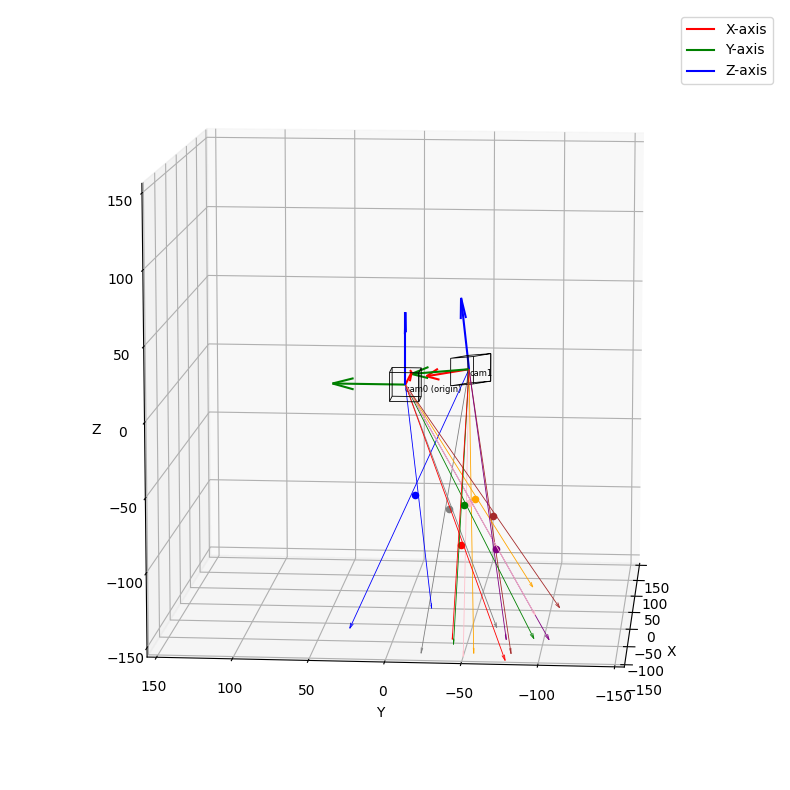

In [23]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

arrow_length = 200

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10, 10))

generate_camera(ax, np.zeros(3), np.eye(3), np.ones(3), arrow_length, pts1_dir_norm, 'cam0 (origin)')
generate_camera(ax, b, R, np.ones(3), arrow_length, pts2_dir_norm, 'cam1')
for index, point in enumerate(triangulated_pts):
    ax.scatter(point[0], point[1], point[2], color=colors[index])

ax.set_box_aspect([1, 1, 1])
ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)
ax.set_zlim(-150, 150)
ax.view_init(elev=10, azim=185)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Create Line2D objects for the legend.
legend_lines = [mlines.Line2D([], [], color='r', label='X-axis'),
                mlines.Line2D([], [], color='g', label='Y-axis'),
                mlines.Line2D([], [], color='b', label='Z-axis')]

# Add legend with Line2D objects.
ax.legend(handles=legend_lines)

plt.show()